In [1]:
import urllib.request
import zipfile
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats

In [2]:
fname = '../data/anage_data.txt'
df = pd.read_csv(fname, sep='\t')
df.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


In [6]:
df = df[df['Body mass (g)'] > 0]
df['Body mass ^ 3/4'] = df['Body mass (g)'] ** (3/4)
df.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References,Body mass ^ 3/4
11,18,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,americanus,American toad,910.0,...,captivity,medium,acceptable,NaN,NaN,0.00829,21.60,288.0,"37,268,426,525,749",10.019368
19,26,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,terrestris,Southern toad,NaN,...,captivity,medium,acceptable,NaN,NaN,0.00698,19.20,288.0,"37,451,749",9.172251
29,36,Animalia,Chordata,Amphibia,Anura,Bufonidae,Rhinella,marina,Cane toad,365.0,...,captivity,large,acceptable,NaN,NaN,0.03030,105.00,293.0,"37,296,485,749",32.801369
53,60,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyla,versicolor,Gray treefrog,730.0,...,captivity,medium,acceptable,NaN,NaN,0.00433,6.97,290.5,"37,528,543,749",4.289677
60,67,Animalia,Chordata,Amphibia,Anura,Hylidae,Pseudacris,crucifer,Spring peeper,912.0,...,unknown,small,low,NaN,NaN,0.00105,0.90,292.0,"37,451,525,528,749",0.924021


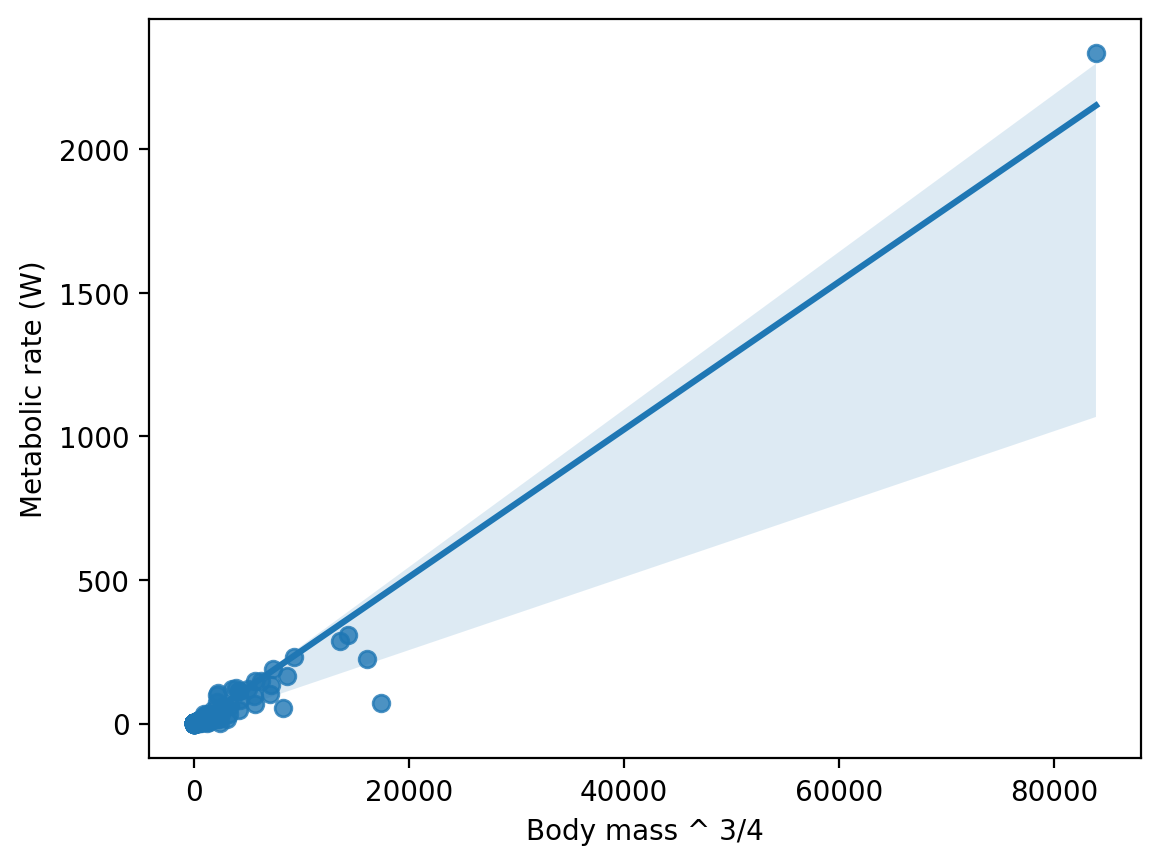

In [7]:
sns.regplot(x='Body mass ^ 3/4', y='Metabolic rate (W)', data=df);

In [19]:
print('Linear regression:')
for clazz, grp in df.groupby('Class'):
    res = scipy.stats.linregress(grp['Body mass ^ 3/4'], grp['Metabolic rate (W)'])
    print("{:8s}: y = {:6.6f} * x + {:2.2g}".format(clazz, res.slope, res.intercept))

Linear regression:
Amphibia: y = 0.000287 * x + 0.0037
Aves    : y = 0.013093 * x + 0.66
Mammalia: y = 0.025817 * x + -4.6
Reptilia: y = 0.001122 * x + -0.021


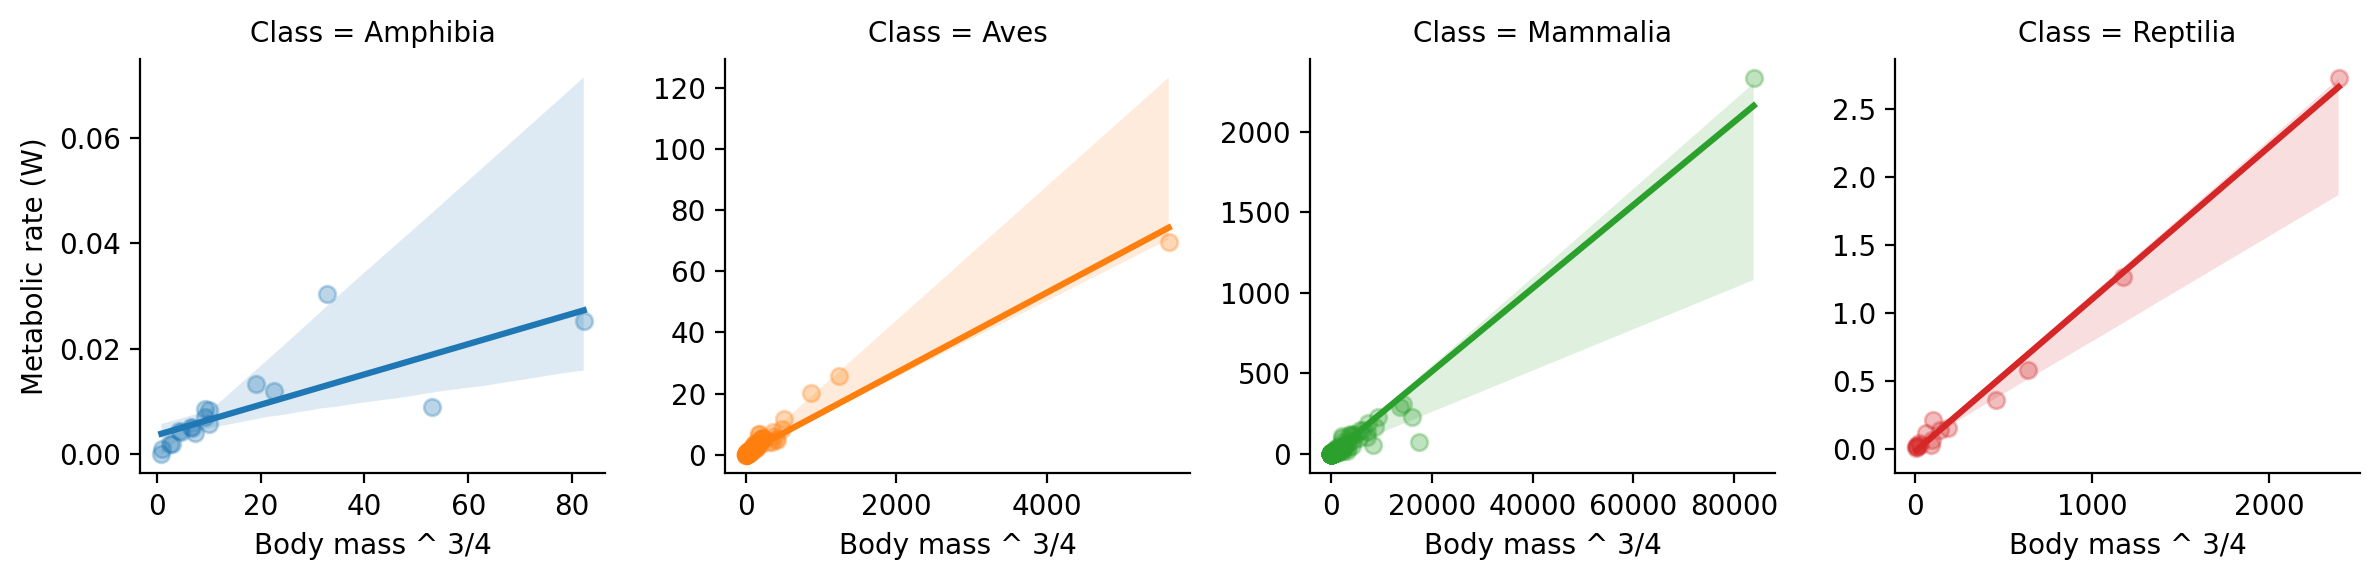

In [10]:
sns.lmplot(
    x='Body mass ^ 3/4', y='Metabolic rate (W)', hue='Class', data=df, col='Class', 
    scatter_kws=dict(alpha=0.3), facet_kws=dict(sharex=False, sharey=False,), height=3);